<a href="https://colab.research.google.com/github/MayJarung/IMAGE-PROCESSING/blob/main/Lab4_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


In [ ]:
!pip install keras wrappers

  Using cached wrappers-0.1.9.tar.gz (2.8 kB)
  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/81/fd/e3859be14b9feda7e11c719d7ffc5288e73664f9224be71fdb97cbd2d4ee/wrappers-0.1.9.tar.gz (from https://pypi.org/simple/wrappers/): Requested wrappers-8ea09d1947ed4640a7265a9fd622c4ad from https://files.pythonhosted.org/packages/81/fd/e3859be14b9feda7e11c719d7ffc5288e73664f9224be71fdb97cbd2d4ee/wrappers-0.1.9.tar.gz has inconsistent name: expected 'wrappers', but metadata has 'wrappers-8ea09d1947ed4640a7265a9fd622c4ad'
  Using cached wrappers-0.1.8.tar.gz (2.7 kB)
  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/a6/8b/631b7d172369efdb26fd34adb2f56233da40665b7b4e99dac11846b154fd/wrappers-0.1.8.tar.gz (from https://pypi.org/simple/wrappers/): Requested wrappers-90ec12605e2240d6981a2c73f5da8e27 from https://files.pythonhosted.org/packages/a6/8b/631b7d172369efdb26fd34adb2f56233da40665b7b4e99dac11846b154fd/wrapper

In [ ]:
!pip install keras==2.9

  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.9.0 which is incompatible.


In [ ]:
#Array, image processing
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Model Operation
from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# io
import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/ImageProcessing/face_mini.zip'
extract_path = '/content/drive/MyDrive/ImageProcessing/ExtractData'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
#import img from file image_mini
files = glob.glob('/content/drive/MyDrive/ImageProcessing/ExtractData/**/*.jpg', recursive = True)
normalized_images = []
for file in files:
  img = load_img(file, target_size=(100, 100), interpolation='nearest')
  img = img_to_array(img)
  img /= 255.0
  normalized_images.append(img)
  # normalized_image_array = np.array(normalized_images)

In [ ]:
# แบ่งชุดข้อมูลเป็น Training_data, Testing_data (70 : 30)
train_x, test_x = train_test_split(normalized_images, random_state=42, test_size=0.3)

In [ ]:
# แบ่งชุดข้อมูล Training_data เป็น Training_data, Validation_data (80:20)
train_x, val_x = train_test_split(train_x, random_state=42, test_size=0.2)

In [ ]:
train_x_np_array = np.array(train_x)
test_x_np_array = np.array(test_x)
val_x_np_array = np.array(val_x)

In [ ]:
# parameter ชุดที่ 1
noise_mean_1 = 0
noise_std_1 = 0.5
noise_factor_1 = 0.3

# parameter ชุดที่ 2
noise_mean_2 = 0
noise_std_2 = 1
noise_factor_2 = 1

In [ ]:
# จาก parameter ชุดที่ 1 ที่อาจารย์กำหนดให้
train_x_noise_1 = train_x_np_array + (noise_factor_1 * np.random.normal(loc=noise_mean_1, scale=noise_std_1, size=(100,100,3)) )
val_x_noise_1 = val_x_np_array + (noise_factor_1 * np.random.normal(loc=noise_mean_1, scale=noise_std_1, size=(100,100,3)) )
test_x_noise_1 = test_x_np_array + (noise_factor_1 * np.random.normal(loc=noise_mean_1, scale=noise_std_1, size=(100,100,3)) )

# จาก parameter ชุดที่ 2 เอามาเปรียบเทียบเฉยๆ
train_x_noise_2 = train_x_np_array + (noise_factor_2 * np.random.normal(loc=noise_mean_2, scale=noise_std_2, size=(100,100,3)) )

In [ ]:
train_x_noise_1_np_array = np.array(train_x_noise_1)
val_x_noise_1_np_array = np.array(val_x_noise_1)
test_x_noise_1_np_array = np.array(test_x_noise_1)

train_x_noise_2_np_array = np.array(train_x_noise_2)

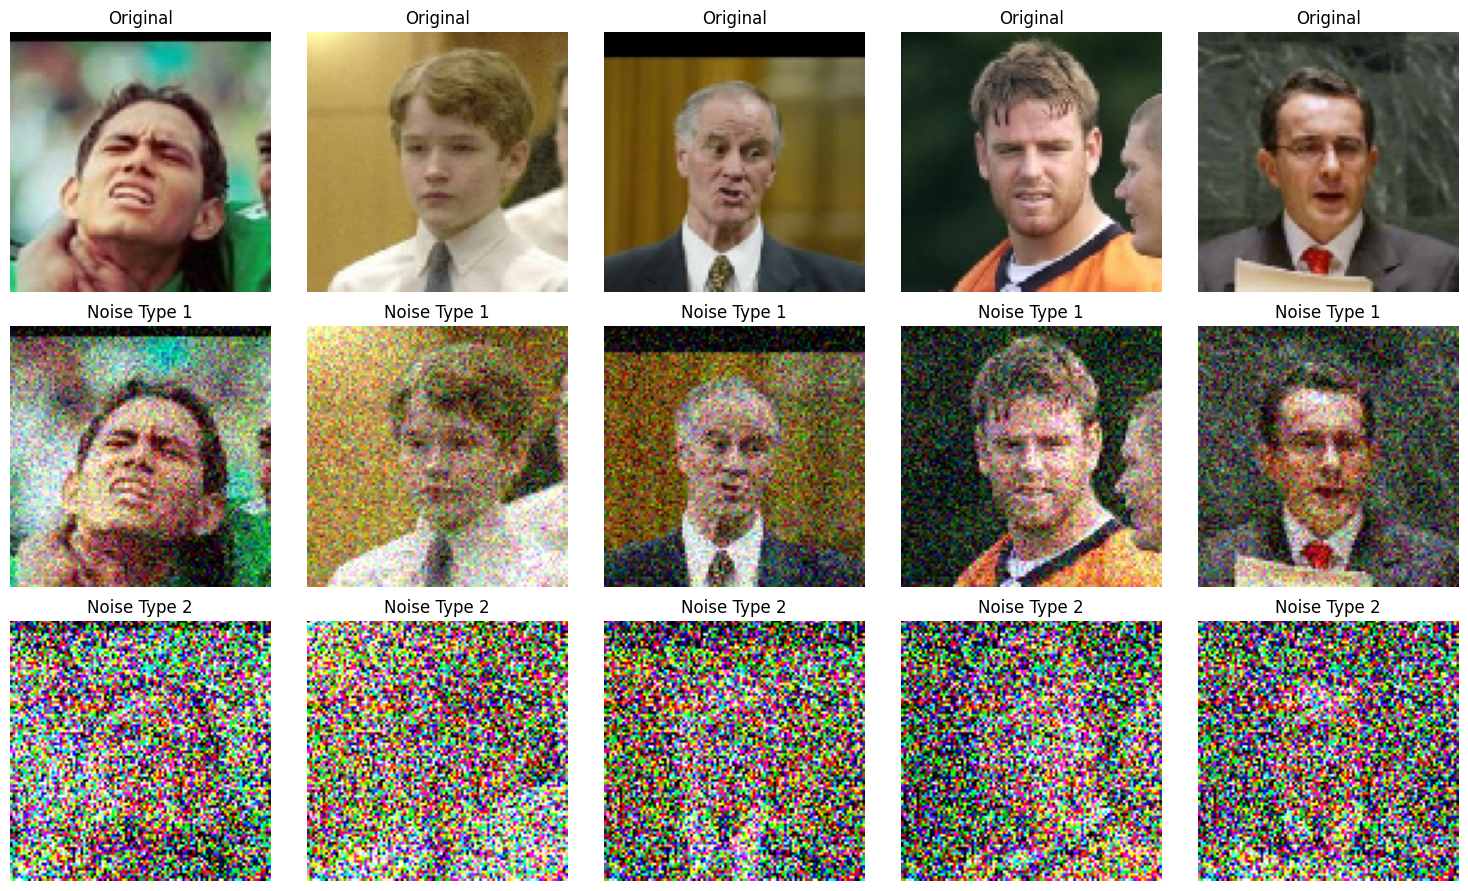

In [ ]:
num_images = 5

# Create subplots with 3 rows and 'num_images' columns
fig, axes = plt.subplots(3, num_images, figsize=(15, 9))

# Plot original images
for i in range(num_images):
    axes[0, i].imshow(train_x_np_array[i])
    axes[0, i].set_title("Original")

# Plot images with noise type 1
for i in range(num_images):
    axes[1, i].imshow(train_x_noise_1_np_array[i])
    axes[1, i].set_title("Noise Type 1")

# Plot images with noise type 2
for i in range(num_images):
    axes[2, i].imshow(train_x_noise_2_np_array[i])
    axes[2, i].set_title("Noise Type 2")

# Remove axis labels and ticks
for ax in axes.flatten():
    ax.axis('off')

# Display the subplots
plt.tight_layout()
plt.show()

In [ ]:
# Input layer
Input_img = Input(shape=(100, 100, 3))

# Encoding architecture
# Layer#1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
# Layer#2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x2)
# Layer#3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
# Layer#4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)
# Layer#6
x6 = UpSampling2D(size=(2, 2))(x5)
# Layer#5
x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)
# Layer#7
x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)
# Layer#8
decoded_img = Conv2D(3, (3, 3), activation='relu', padding='same')(x8)

In [ ]:
# สร้ํางโมเดล autoencoder และกำหนด optimizer setting
autoencoder = Model(Input_img, decoded_img)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

#loss ใช้ Mean Square Error
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 256)     7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     295040    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                             

In [ ]:
# กำหนด Training parameter
epoc = 2
batch_sizes_16 = 16
batch_sizes_32 = 32

In [ ]:
# เริ่มการฝึกอบรมและทดลอง epoch และ batch size ที่ต่างกัน
print(f"Training with {epoc} epochs and batch size {batch_sizes_16}")

# Early Stopping Callback
callback = EarlyStopping(monitor='loss', patience=3)

# เริ่มการฝึกอบรม
history = autoencoder.fit(train_x_noise_1_np_array, train_x_np_array,
                          epochs=epoc,
                          batch_size=batch_sizes_16,
                          shuffle=True,
                          validation_data=(val_x_noise_1_np_array, val_x_np_array),
                          callbacks=[callback], verbose=1)

# พิมพ์ค่า loss สุดท้ายที่ได้จากการฝึกอบรม
print(f"Final Loss after {epoc} epochs and batch size {batch_sizes_16}: {history.history['loss'][-1]}")

Training with 2 epochs and batch size 16
Epoch 1/2
113/113 [==============================] - 2142s 19s/step - loss: 0.0222 - val_loss: 0.0042
Epoch 2/2
113/113 [==============================] - 2091s 19s/step - loss: 0.0033 - val_loss: 0.0031
Final Loss after 2 epochs and batch size 16: 0.003341030329465866


In [ ]:
epoc = 2
batch_sizes_32 = 32

In [ ]:
# เริ่มการฝึกอบรมและทดลอง epoch และ batch size ที่ต่างกัน
print(f"Training with {epoc} epochs and batch size {batch_sizes_32}")

# Early Stopping Callback
callback = EarlyStopping(monitor='loss', patience=3)

# เริ่มการฝึกอบรม
history = autoencoder.fit(train_x_noise_1_np_array, train_x_np_array,
                          epochs=epoc,
                          batch_size=batch_sizes_32,
                          shuffle=True,
                          validation_data=(val_x_noise_1_np_array, val_x_np_array),
                          callbacks=[callback], verbose=1)

# พิมพ์ค่า loss สุดท้ายที่ได้จากการฝึกอบรม
print(f"Final Loss after {epoc} epochs and batch size {batch_sizes_32}: {history.history['loss'][-1]}")

Training with 2 epochs and batch size 32
Epoch 1/2
57/57 [==============================] - 1958s 34s/step - loss: 0.0027 - val_loss: 0.0026
Epoch 2/2
57/57 [==============================] - 1954s 34s/step - loss: 0.0023 - val_loss: 0.0023
Final Loss after 2 epochs and batch size 32: 0.0022857910953462124


In [ ]:
print(len(test_x_noise_1_np_array))

961


In [ ]:
# ทดสอบ autoencoder model ด้วย test data
predictions_test = np.array(autoencoder.predict(test_x_noise_1_np_array))

31/31 [==============================] - 288s 9s/step


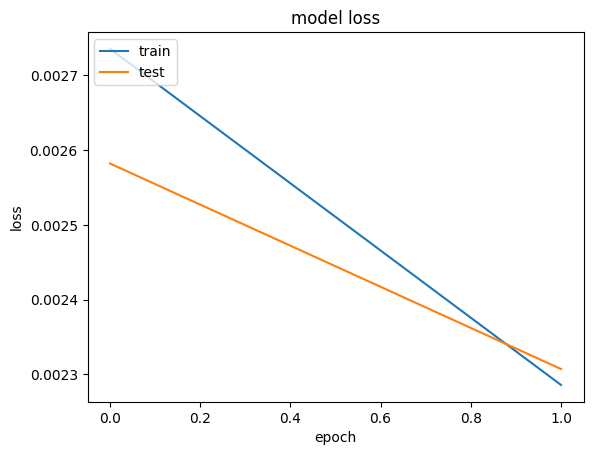

In [ ]:
#View Loss from history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

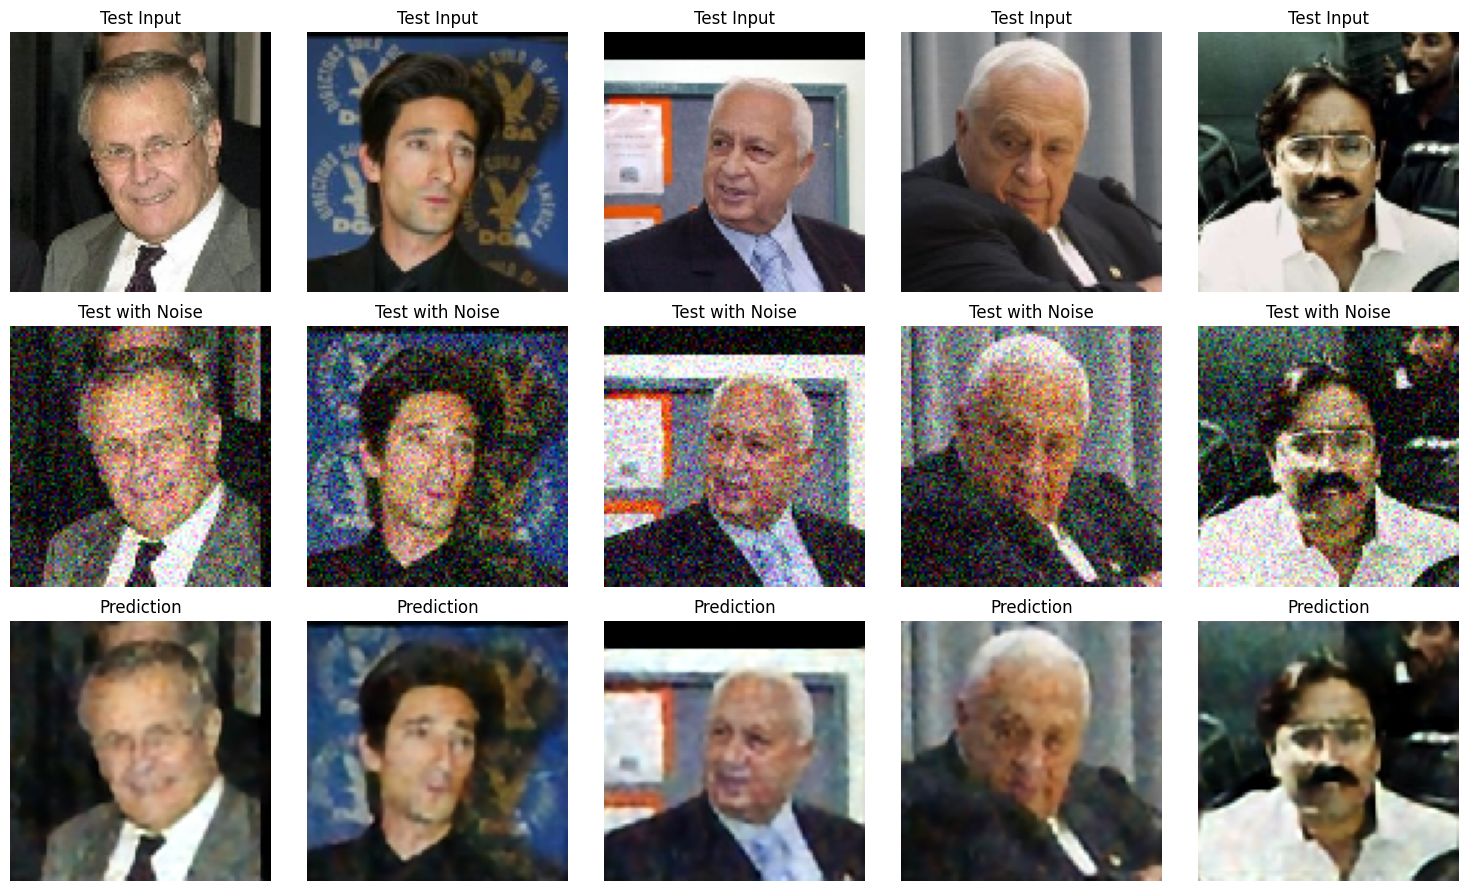

In [ ]:
# Display Result image
num_images = 5

# Create subplots with 3 rows and 'num_images' columns
fig, axes = plt.subplots(3, num_images, figsize=(15, 9))

# Plot original images
for i in range(num_images):
    axes[0, i].imshow(test_x_np_array[i])
    axes[0, i].set_title("Test Input")

# Plot images with noise type 1
for i in range(num_images):
    axes[1, i].imshow(test_x_noise_1_np_array[i])
    axes[1, i].set_title("Test with Noise")

# Plot images with predictions_test
for i in range(num_images):
    axes[2, i].imshow(predictions_test[i])
    axes[2, i].set_title("Prediction")

# Remove axis labels and ticks
for ax in axes.flatten():
    ax.axis('off')

# Display the subplots
plt.tight_layout()
plt.show()